In [1]:
import os, joblib
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
def load_mnist_dataset(
                        entryption_split=0.1,
                        random_state=42
                        ):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype(np.float32) / 255.0
    x_test = x_test.astype(np.float32) / 255.0

    x_train, y_train = shuffle(x_train, y_train, random_state=random_state)
    x_test, y_test = shuffle(x_test, y_test, random_state=random_state)
    
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    x_train, x_enc, y_train, y_enc = train_test_split(
                                                    x_train, y_train, 
                                                    test_size=entryption_split, 
                                                    random_state=42
                                                    )
    return (x_train, y_train), (x_test, y_test), (x_enc, y_enc)

In [3]:
def build_mnist_classifier():
    model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])
    model.compile(
                optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=[
                        tf.keras.metrics.CategoricalAccuracy(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        tf.keras.metrics.AUC()
                        ]
                )
    return model

def train_mnist_classifier(
                            model, 
                            x_train, y_train, 
                            x_test, y_test,
                            model_path
                            ):
    early_stopping = tf.keras.callbacks.EarlyStopping(
                                                        monitor='val_loss', 
                                                        patience=10, 
                                                        restore_best_weights=True
                                                        )               
    history = model.fit(
                        x_train, 
                        tf.keras.utils.to_categorical(y_train), 
                        epochs=10, 
                        batch_size=64,
                        validation_data=(
                                        x_test, 
                                        tf.keras.utils.to_categorical(y_test)
                                        ),
                        callbacks=[early_stopping],
                        verbose=1
                        )
    model.save(model_path)
    return history

def load_mnist_classifier(model_path):
    model = tf.keras.models.load_model(model_path)
    model.compile(
                    optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=[
                            tf.keras.metrics.CategoricalAccuracy(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()
                            ]
                    )
    return model

def train_pipeline(model_path):
    (x_train, y_train), (x_test, y_test), (_, _) = load_mnist_dataset()
    model = build_mnist_classifier()
    history = train_mnist_classifier(model, x_train, y_train, x_test, y_test, model_path)
    return history

def train_n_models(
                    n = 9,
                    model_path = 'models/C01/local {}.h5',
                    ):
    history_dict = {}
    for i in range(n):
        if not os.path.exists(model_path.format(i)):
            history = train_pipeline(model_path.format(i))
            history_dict[f"{i}"] = history
        print(f'Local Model : {i} trained\n\n')

    return history_dict

In [4]:
history_dict = train_n_models()

Epoch 1/10


c:\Users\isuru\anaconda3\envs\uni\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - auc: 0.9782 - categorical_accuracy: 0.8612 - loss: 0.4604 - precision: 0.9275 - recall: 0.7928 - val_auc: 0.9996 - val_categorical_accuracy: 0.9855 - val_loss: 0.0478 - val_precision: 0.9882 - val_recall: 0.9833
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc: 0.9993 - categorical_accuracy: 0.9821 - loss: 0.0585 - precision: 0.9845 - recall: 0.9803 - val_auc: 0.9998 - val_categorical_accuracy: 0.9842 - val_loss: 0.0486 - val_precision: 0.9857 - val_recall: 0.9821
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc: 0.9995 - categorical_accuracy: 0.9869 - loss: 0.0415 - precision: 0.9884 - recall: 0.9859 - val_auc: 0.9997 - val_categorical_accuracy: 0.9910 - val_loss: 0.0277 - val_precision: 0.9922 - val_recall: 0.9899
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc: 0.9997 - categorical_accuracy: 0.9913 - loss: 0.0282 - precision: 0.9921 - recall: 0.9904 - val_auc: 0.9995 - val_categorical_accuracy: 0.9890 - val_loss:

Local Model : 0 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_1: 0.9791 - categorical_accuracy: 0.8610 - loss: 0.4573 - precision_1: 0.9295 - recall_1: 0.7935 - val_auc_1: 0.9995 - val_categorical_accuracy: 0.9822 - val_loss: 0.0560 - val_precision_1: 0.9843 - val_recall_1: 0.9806
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_1: 0.9993 - categorical_accuracy: 0.9833 - loss: 0.0527 - precision_1: 0.9857 - recall_1: 0.9814 - val_auc_1: 0.9996 - val_categorical_accuracy: 0.9868 - val_loss: 0.0405 - val_precision_1: 0.9885 - val_recall_1: 0.9854
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_1: 0.9996 - categorical_accuracy: 0.9886 - loss: 0.0370 - precision_1: 0.9898 - recall_1: 0.9878 - val_auc_1: 0.9994 - val_categorical_accuracy: 0.9875 - val_loss: 0.0387 - val_precision_1: 0.9881 - val_recall_1: 0.9861
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_1: 0.9997 - categorical_accuracy: 0.9916 - loss: 0.0263 - precision_1: 0.9924 - re

Local Model : 1 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - auc_2: 0.9764 - categorical_accuracy: 0.8530 - loss: 0.4758 - precision_2: 0.9259 - recall_2: 0.7877 - val_auc_2: 0.9997 - val_categorical_accuracy: 0.9846 - val_loss: 0.0522 - val_precision_2: 0.9883 - val_recall_2: 0.9821
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_2: 0.9994 - categorical_accuracy: 0.9832 - loss: 0.0529 - precision_2: 0.9853 - recall_2: 0.9818 - val_auc_2: 0.9995 - val_categorical_accuracy: 0.9861 - val_loss: 0.0412 - val_precision_2: 0.9879 - val_recall_2: 0.9840
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_2: 0.9996 - categorical_accuracy: 0.9882 - loss: 0.0364 - precision_2: 0.9897 - recall_2: 0.9871 - val_auc_2: 0.9996 - val_categorical_accuracy: 0.9883 - val_loss: 0.0363 - val_precision_2: 0.9895 - val_recall_2: 0.9872
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_2: 0.9998 - categorical_accuracy: 0.9914 - loss: 0.0267 - precision_2: 0.9919 - re

Local Model : 2 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_3: 0.9781 - categorical_accuracy: 0.8606 - loss: 0.4528 - precision_3: 0.9295 - recall_3: 0.7965 - val_auc_3: 0.9997 - val_categorical_accuracy: 0.9842 - val_loss: 0.0493 - val_precision_3: 0.9881 - val_recall_3: 0.9804
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_3: 0.9993 - categorical_accuracy: 0.9829 - loss: 0.0554 - precision_3: 0.9855 - recall_3: 0.9812 - val_auc_3: 0.9996 - val_categorical_accuracy: 0.9863 - val_loss: 0.0406 - val_precision_3: 0.9882 - val_recall_3: 0.9847
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_3: 0.9995 - categorical_accuracy: 0.9879 - loss: 0.0386 - precision_3: 0.9895 - recall_3: 0.9867 - val_auc_3: 0.9997 - val_categorical_accuracy: 0.9891 - val_loss: 0.0364 - val_precision_3: 0.9905 - val_recall_3: 0.9877
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_3: 0.9998 - categorical_accuracy: 0.9907 - loss: 0.0287 - precision_3: 0.9917 - re

Local Model : 3 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_4: 0.9781 - categorical_accuracy: 0.8628 - loss: 0.4547 - precision_4: 0.9322 - recall_4: 0.7951 - val_auc_4: 0.9997 - val_categorical_accuracy: 0.9845 - val_loss: 0.0441 - val_precision_4: 0.9870 - val_recall_4: 0.9832
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_4: 0.9992 - categorical_accuracy: 0.9832 - loss: 0.0576 - precision_4: 0.9854 - recall_4: 0.9814 - val_auc_4: 0.9995 - val_categorical_accuracy: 0.9849 - val_loss: 0.0456 - val_precision_4: 0.9866 - val_recall_4: 0.9832
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_4: 0.9997 - categorical_accuracy: 0.9889 - loss: 0.0354 - precision_4: 0.9901 - recall_4: 0.9879 - val_auc_4: 0.9995 - val_categorical_accuracy: 0.9880 - val_loss: 0.0374 - val_precision_4: 0.9894 - val_recall_4: 0.9872
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_4: 0.9998 - categorical_accuracy: 0.9912 - loss: 0.0268 - precision_4: 0.9919 - re

Local Model : 4 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_5: 0.9768 - categorical_accuracy: 0.8529 - loss: 0.4629 - precision_5: 0.9241 - recall_5: 0.7928 - val_auc_5: 0.9996 - val_categorical_accuracy: 0.9783 - val_loss: 0.0666 - val_precision_5: 0.9813 - val_recall_5: 0.9756
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_5: 0.9993 - categorical_accuracy: 0.9815 - loss: 0.0588 - precision_5: 0.9846 - recall_5: 0.9797 - val_auc_5: 0.9995 - val_categorical_accuracy: 0.9850 - val_loss: 0.0453 - val_precision_5: 0.9873 - val_recall_5: 0.9838
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_5: 0.9995 - categorical_accuracy: 0.9877 - loss: 0.0401 - precision_5: 0.9889 - recall_5: 0.9869 - val_auc_5: 0.9995 - val_categorical_accuracy: 0.9910 - val_loss: 0.0308 - val_precision_5: 0.9918 - val_recall_5: 0.9901
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_5: 0.9997 - categorical_accuracy: 0.9912 - loss: 0.0276 - precision_5: 0.9920 - re

Local Model : 5 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_6: 0.9774 - categorical_accuracy: 0.8589 - loss: 0.4621 - precision_6: 0.9269 - recall_6: 0.7916 - val_auc_6: 0.9994 - val_categorical_accuracy: 0.9776 - val_loss: 0.0693 - val_precision_6: 0.9824 - val_recall_6: 0.9748
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_6: 0.9993 - categorical_accuracy: 0.9822 - loss: 0.0577 - precision_6: 0.9840 - recall_6: 0.9804 - val_auc_6: 0.9997 - val_categorical_accuracy: 0.9894 - val_loss: 0.0335 - val_precision_6: 0.9903 - val_recall_6: 0.9886
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_6: 0.9996 - categorical_accuracy: 0.9884 - loss: 0.0371 - precision_6: 0.9898 - recall_6: 0.9873 - val_auc_6: 0.9997 - val_categorical_accuracy: 0.9888 - val_loss: 0.0373 - val_precision_6: 0.9904 - val_recall_6: 0.9881
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_6: 0.9997 - categorical_accuracy: 0.9908 - loss: 0.0297 - precision_6: 0.9914 - re

Local Model : 6 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_7: 0.9800 - categorical_accuracy: 0.8698 - loss: 0.4341 - precision_7: 0.9316 - recall_7: 0.8039 - val_auc_7: 0.9994 - val_categorical_accuracy: 0.9787 - val_loss: 0.0636 - val_precision_7: 0.9825 - val_recall_7: 0.9761
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_7: 0.9992 - categorical_accuracy: 0.9810 - loss: 0.0610 - precision_7: 0.9840 - recall_7: 0.9791 - val_auc_7: 0.9997 - val_categorical_accuracy: 0.9882 - val_loss: 0.0369 - val_precision_7: 0.9899 - val_recall_7: 0.9868
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_7: 0.9996 - categorical_accuracy: 0.9888 - loss: 0.0355 - precision_7: 0.9897 - recall_7: 0.9880 - val_auc_7: 0.9995 - val_categorical_accuracy: 0.9896 - val_loss: 0.0323 - val_precision_7: 0.9907 - val_recall_7: 0.9886
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_7: 0.9997 - categorical_accuracy: 0.9910 - loss: 0.0279 - precision_7: 0.9919 - re

Local Model : 7 trained


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_8: 0.9770 - categorical_accuracy: 0.8597 - loss: 0.4627 - precision_8: 0.9310 - recall_8: 0.7937 - val_auc_8: 0.9996 - val_categorical_accuracy: 0.9845 - val_loss: 0.0473 - val_precision_8: 0.9864 - val_recall_8: 0.9829
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_8: 0.9994 - categorical_accuracy: 0.9823 - loss: 0.0565 - precision_8: 0.9842 - recall_8: 0.9807 - val_auc_8: 0.9996 - val_categorical_accuracy: 0.9834 - val_loss: 0.0484 - val_precision_8: 0.9861 - val_recall_8: 0.9811
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_8: 0.9996 - categorical_accuracy: 0.9874 - loss: 0.0383 - precision_8: 0.9886 - recall_8: 0.9863 - val_auc_8: 0.9997 - val_categorical_accuracy: 0.9900 - val_loss: 0.0294 - val_precision_8: 0.9914 - val_recall_8: 0.9893
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_8: 0.9996 - categorical_accuracy: 0.9906 - loss: 0.0299 - precision_8: 0.9916 - re

Local Model : 8 trained




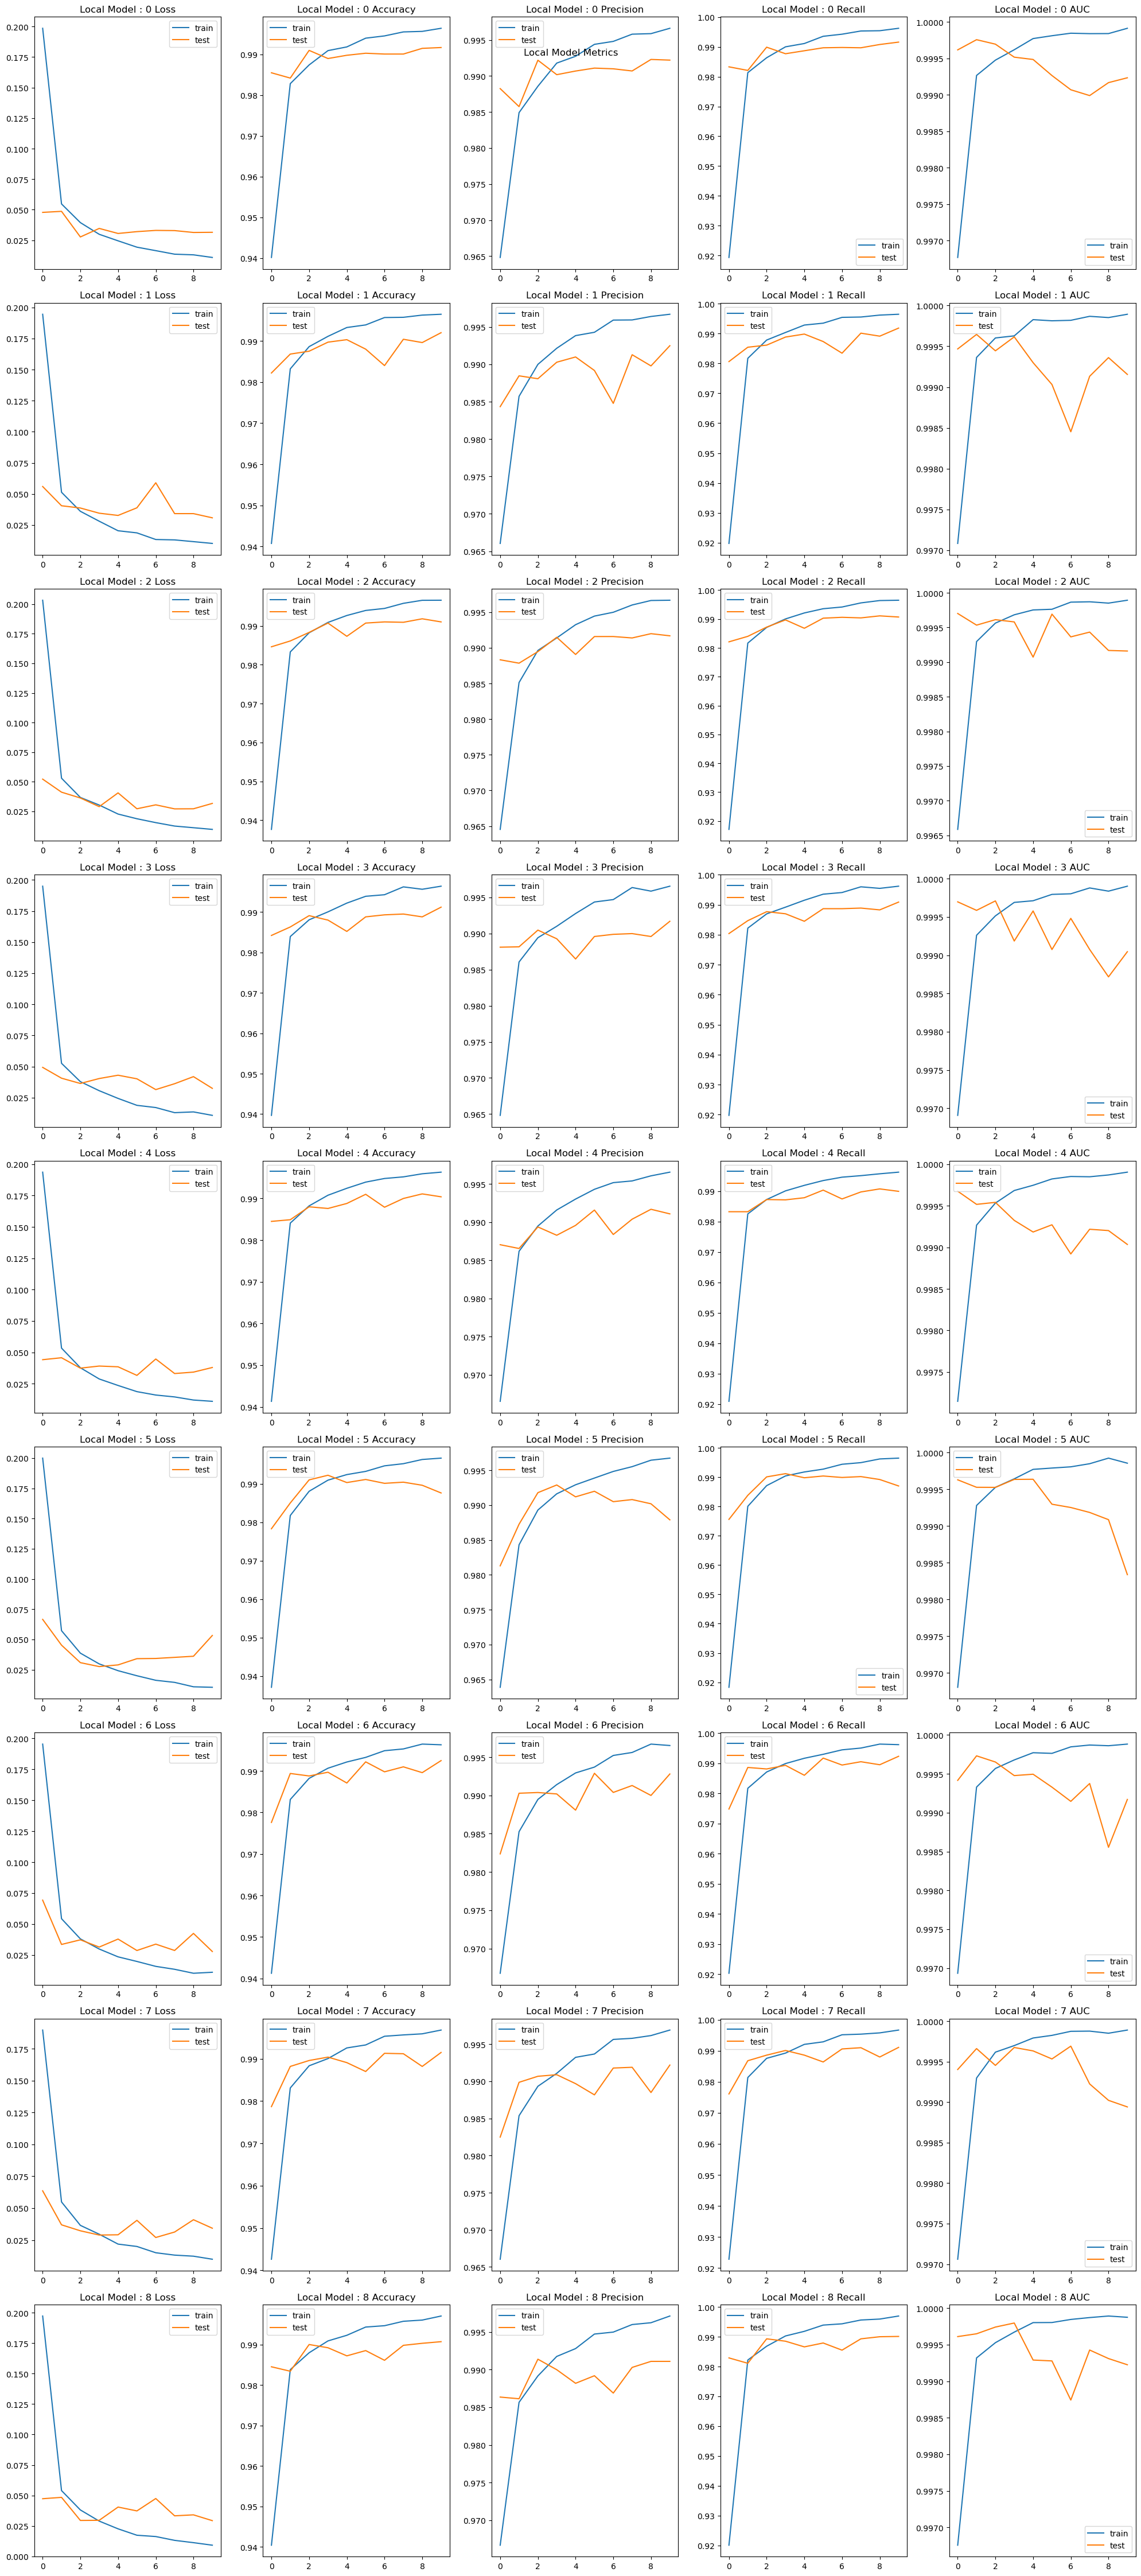

In [8]:
# create 9 x 2 subplots
fig, axs = plt.subplots(9, 5, figsize=(20, 45))

# plot loss and val_loss
for i in range(9):
    axs[i, 0].plot(history_dict[f"{i}"].history['loss'], label='train')
    axs[i, 0].plot(history_dict[f"{i}"].history['val_loss'], label='test')
    axs[i, 0].set_title(f'Local Model : {i} Loss')
    axs[i, 0].legend()

    axs[i, 1].plot(history_dict[f"{i}"].history['categorical_accuracy'], label='train')
    axs[i, 1].plot(history_dict[f"{i}"].history['val_categorical_accuracy'], label='test')
    axs[i, 1].set_title(f'Local Model : {i} Accuracy')
    axs[i, 1].legend()

    if i == 0:
        axs[i, 2].plot(history_dict[f"{i}"].history[f'precision'], label='train')
        axs[i, 2].plot(history_dict[f"{i}"].history[f'val_precision'], label='test')
        axs[i, 2].set_title(f'Local Model : {i} Precision')
        axs[i, 2].legend()

        axs[i, 3].plot(history_dict[f"{i}"].history[f'recall'], label='train')
        axs[i, 3].plot(history_dict[f"{i}"].history[f'val_recall'], label='test')
        axs[i, 3].set_title(f'Local Model : {i} Recall')
        axs[i, 3].legend()

        axs[i, 4].plot(history_dict[f"{i}"].history[f'auc'], label='train')
        axs[i, 4].plot(history_dict[f"{i}"].history[f'val_auc'], label='test')
        axs[i, 4].set_title(f'Local Model : {i} AUC')
        axs[i, 4].legend()

    else:
        axs[i, 2].plot(history_dict[f"{i}"].history[f'precision_{i}'], label='train')
        axs[i, 2].plot(history_dict[f"{i}"].history[f'val_precision_{i}'], label='test')
        axs[i, 2].set_title(f'Local Model : {i} Precision')
        axs[i, 2].legend()

        axs[i, 3].plot(history_dict[f"{i}"].history[f'recall_{i}'], label='train')
        axs[i, 3].plot(history_dict[f"{i}"].history[f'val_recall_{i}'], label='test')
        axs[i, 3].set_title(f'Local Model : {i} Recall')
        axs[i, 3].legend()

        axs[i, 4].plot(history_dict[f"{i}"].history[f'auc_{i}'], label='train')
        axs[i, 4].plot(history_dict[f"{i}"].history[f'val_auc_{i}'], label='test')
        axs[i, 4].set_title(f'Local Model : {i} AUC')
        axs[i, 4].legend()

plt.tight_layout()
plt.suptitle('Local Model Metrics')
plt.show()

In [11]:
def encrypt_evaluations(
                        seeds = [
                                22,
                                1234,
                                657859
                                ],
                        model_ids = [0,1,2,3,5,7,8],
                        encryption_path = 'files/C01/encrypt.joblib',
                        save_flag = True
                        ):
        encrypt_dict = {}
        encrypt_dict['Model Id'] = []
        encrypt_dict['Seed'] = []
        encrypt_dict['Accuracy'] = []
        encrypt_dict['Precision'] = []
        encrypt_dict['Recall'] = []
        encrypt_dict['AUC'] = []
        for seed in seeds:
            np.random.seed(seed)
            tf.random.set_seed(seed)
            (_, _), (_, _), (x_enc, y_enc) = load_mnist_dataset(random_state=seed)

            for model_id in model_ids:
                model = load_mnist_classifier(f'models/C01/local {model_id}.h5')
                _, acc, prec, rec, auc = model.evaluate(x_enc, tf.keras.utils.to_categorical(y_enc))
                encrypt_dict['Model Id'].append(model_id)
                encrypt_dict['Seed'].append(seed)

                acc = round(acc, 6)
                prec = round(prec, 6)
                rec = round(rec, 6)
                auc = round(auc, 6)

                encrypt_dict['Accuracy'].append(acc)
                encrypt_dict['Precision'].append(prec)
                encrypt_dict['Recall'].append(rec)
                encrypt_dict['AUC'].append(auc)

        encrypt_df = pd.DataFrame(encrypt_dict)
        if save_flag:
            joblib.dump(encrypt_df, encryption_path)
        else:
            return encrypt_df
        
def verify_encryption():
    encrypt_df_prev = joblib.load('files/C01/encrypt.joblib')
    encrypt_df_new = encrypt_evaluations(save_flag=False)
    assert encrypt_df_prev.equals(encrypt_df_new), 'Encryption Verification Failed'


In [12]:
encrypt_evaluations()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_21: 0.9996 - categorical_accuracy: 0.9944 - loss: 0.0203 - precision_21: 0.9947 - recall_21: 0.9942


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_22: 0.9998 - categorical_accuracy: 0.9979 - loss: 0.0086 - precision_22: 0.9979 - recall_22: 0.9978


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_23: 0.9997 - categorical_accuracy: 0.9985 - loss: 0.0086 - precision_23: 0.9987 - recall_23: 0.9985


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_24: 0.9998 - categorical_accuracy: 0.9957 - loss: 0.0140 - precision_24: 0.9957 - recall_24: 0.9957


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_25: 0.9999 - categorical_accuracy: 0.9954 - loss: 0.0159 - precision_25: 0.9956 - recall_25: 0.9953


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_26: 0.9999 - categorical_accuracy: 0.9968 - loss: 0.0097 - precision_26: 0.9968 - recall_26: 0.9968


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_27: 0.9999 - categorical_accuracy: 0.9987 - loss: 0.0077 - precision_27: 0.9987 - recall_27: 0.9987


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_28: 0.9997 - categorical_accuracy: 0.9927 - loss: 0.0220 - precision_28: 0.9931 - recall_28: 0.9925


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_29: 0.9999 - categorical_accuracy: 0.9993 - loss: 0.0043 - precision_29: 0.9993 - recall_29: 0.9992


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_30: 0.9999 - categorical_accuracy: 0.9971 - loss: 0.0098 - precision_30: 0.9976 - recall_30: 0.9969


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_31: 0.9999 - categorical_accuracy: 0.9958 - loss: 0.0150 - precision_31: 0.9959 - recall_31: 0.9955


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_32: 0.9999 - categorical_accuracy: 0.9960 - loss: 0.0144 - precision_32: 0.9963 - recall_32: 0.9955


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_33: 1.0000 - categorical_accuracy: 0.9986 - loss: 0.0070 - precision_33: 0.9986 - recall_33: 0.9986


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_34: 0.9998 - categorical_accuracy: 0.9974 - loss: 0.0087 - precision_34: 0.9974 - recall_34: 0.9974


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_35: 1.0000 - categorical_accuracy: 0.9944 - loss: 0.0170 - precision_35: 0.9953 - recall_35: 0.9939


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_36: 1.0000 - categorical_accuracy: 0.9977 - loss: 0.0061 - precision_36: 0.9977 - recall_36: 0.9974


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_37: 1.0000 - categorical_accuracy: 0.9982 - loss: 0.0055 - precision_37: 0.9982 - recall_37: 0.9982


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_38: 1.0000 - categorical_accuracy: 0.9952 - loss: 0.0124 - precision_38: 0.9955 - recall_38: 0.9952


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_39: 0.9998 - categorical_accuracy: 0.9936 - loss: 0.0209 - precision_39: 0.9946 - recall_39: 0.9933


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_40: 1.0000 - categorical_accuracy: 0.9961 - loss: 0.0090 - precision_40: 0.9963 - recall_40: 0.9961


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_41: 1.0000 - categorical_accuracy: 0.9978 - loss: 0.0057 - precision_41: 0.9979 - recall_41: 0.9978


In [13]:
verify_encryption()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_42: 0.9996 - categorical_accuracy: 0.9944 - loss: 0.0203 - precision_42: 0.9947 - recall_42: 0.9942


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_43: 0.9998 - categorical_accuracy: 0.9979 - loss: 0.0086 - precision_43: 0.9979 - recall_43: 0.9978


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_44: 0.9997 - categorical_accuracy: 0.9985 - loss: 0.0086 - precision_44: 0.9987 - recall_44: 0.9985


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_45: 0.9998 - categorical_accuracy: 0.9957 - loss: 0.0140 - precision_45: 0.9957 - recall_45: 0.9957


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_46: 0.9999 - categorical_accuracy: 0.9954 - loss: 0.0159 - precision_46: 0.9956 - recall_46: 0.9953


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_47: 0.9999 - categorical_accuracy: 0.9968 - loss: 0.0097 - precision_47: 0.9968 - recall_47: 0.9968


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_48: 0.9999 - categorical_accuracy: 0.9987 - loss: 0.0077 - precision_48: 0.9987 - recall_48: 0.9987


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_49: 0.9997 - categorical_accuracy: 0.9927 - loss: 0.0220 - precision_49: 0.9931 - recall_49: 0.9925


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_50: 0.9999 - categorical_accuracy: 0.9993 - loss: 0.0043 - precision_50: 0.9993 - recall_50: 0.9992


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_51: 0.9999 - categorical_accuracy: 0.9971 - loss: 0.0098 - precision_51: 0.9976 - recall_51: 0.9969


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_52: 0.9999 - categorical_accuracy: 0.9958 - loss: 0.0150 - precision_52: 0.9959 - recall_52: 0.9955


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_53: 0.9999 - categorical_accuracy: 0.9960 - loss: 0.0144 - precision_53: 0.9963 - recall_53: 0.9955


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_54: 1.0000 - categorical_accuracy: 0.9986 - loss: 0.0070 - precision_54: 0.9986 - recall_54: 0.9986


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_55: 0.9998 - categorical_accuracy: 0.9974 - loss: 0.0087 - precision_55: 0.9974 - recall_55: 0.9974


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_56: 1.0000 - categorical_accuracy: 0.9944 - loss: 0.0170 - precision_56: 0.9953 - recall_56: 0.9939


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_57: 1.0000 - categorical_accuracy: 0.9977 - loss: 0.0061 - precision_57: 0.9977 - recall_57: 0.9974


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_58: 1.0000 - categorical_accuracy: 0.9982 - loss: 0.0055 - precision_58: 0.9982 - recall_58: 0.9982


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_59: 1.0000 - categorical_accuracy: 0.9952 - loss: 0.0124 - precision_59: 0.9955 - recall_59: 0.9952


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_60: 0.9998 - categorical_accuracy: 0.9936 - loss: 0.0209 - precision_60: 0.9946 - recall_60: 0.9933


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_61: 1.0000 - categorical_accuracy: 0.9961 - loss: 0.0090 - precision_61: 0.9963 - recall_61: 0.9961


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_62: 1.0000 - categorical_accuracy: 0.9978 - loss: 0.0057 - precision_62: 0.9979 - recall_62: 0.9978


In [18]:
def model_decryption(
                    model_id,
                    seeds = [
                            22,
                            1234,
                            657859,
                            ],
                    encryption_path = 'files/C01/encrypt.joblib'
                    ):
        encrypt_df = joblib.load(encryption_path)
        model = load_mnist_classifier(f'models/C01/local {model_id}.h5')
        for seed in seeds:
                np.random.seed(seed)
                tf.random.set_seed(seed)
                (_, _), (_, _), (x_enc, y_enc) = load_mnist_dataset(random_state=seed)

                _, acc, prec, rec, auc = model.evaluate(x_enc, tf.keras.utils.to_categorical(y_enc))

                acc = round(acc, 6)
                prec = round(prec, 6)
                rec = round(rec, 6)
                auc = round(auc, 6)

                encrypt_df_seed = encrypt_df[encrypt_df['Seed'] == seed]

                decryption_flag = encrypt_df_seed[
                                                (encrypt_df_seed['Accuracy'] == acc) & \
                                                (encrypt_df_seed['Precision'] == prec) & \
                                                (encrypt_df_seed['Recall'] == rec) & \
                                                (encrypt_df_seed['AUC'] == auc)
                                                ].shape[0] > 0
                if not decryption_flag:
                        print(f'Decryption Failed for Model : {model_id} and Seed : {seed}')
                        return
                
        print(f'Decryption Successful for Model : {model_id}')

In [19]:
model_decryption(6)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_63: 0.9999 - categorical_accuracy: 0.9971 - loss: 0.0105 - precision_63: 0.9972 - recall_63: 0.9966
Decryption Failed for Model : 6 and Seed : 22
